In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import openpyxl

In [3]:
df = pd.read_excel('/Users/yoeun/Downloads/study/E Commerce Dataset.xlsx', sheet_name=1)

In [4]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
import numpy as np

np.random.seed(42)  # 시드 고정
df['Tenure'].fillna(np.random.randint(61,72), inplace=True)
df['WarehouseToHome'].fillna(0, inplace=True)

df = df[df['HourSpendOnApp'].notna()]
df.drop(columns=['OrderAmountHikeFromlastYear'], inplace=True)
df['CouponUsed'].fillna(0, inplace=True)
df['OrderCount'].fillna(0, inplace=True)
df = df[df['DaySinceLastOrder'].notna()]
df = df[~df['DaySinceLastOrder'].isin([31, 46, 30])] 

/var/folders/b1/g1njf16x0rz622dj3vfvfyy80000gn/T/ipykernel_54656/4143997425.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tenure'].fillna(np.random.randint(61,72), inplace=True)
/var/folders/b1/g1njf16x0rz622dj3vfvfyy80000gn/T/ipykernel_54656/4143997425.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5065 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                5065 non-null   int64  
 1   Churn                     5065 non-null   int64  
 2   Tenure                    5065 non-null   float64
 3   PreferredLoginDevice      5065 non-null   object 
 4   CityTier                  5065 non-null   int64  
 5   WarehouseToHome           5065 non-null   float64
 6   PreferredPaymentMode      5065 non-null   object 
 7   Gender                    5065 non-null   object 
 8   HourSpendOnApp            5065 non-null   float64
 9   NumberOfDeviceRegistered  5065 non-null   int64  
 10  PreferedOrderCat          5065 non-null   object 
 11  SatisfactionScore         5065 non-null   int64  
 12  MaritalStatus             5065 non-null   object 
 13  NumberOfAddress           5065 non-null   int64  
 14  Complain     

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 속성이 object인 데이터들의 집합
cat_col = [col for col in df.columns if df[col].dtypes == 'object']

# 속성이 object 아닌 데이터들의 집합
num_col = [col for col in df.columns if df[col].dtypes != 'object']


# 범주형 변수를 숫자로 인코딩 - 추후 predict streamlit 을 위해 하나의 내용으로 변경
label_encoders = {
    'PreferredLoginDevice': LabelEncoder(),
    'PreferredPaymentMode': LabelEncoder(),
    'Gender': LabelEncoder(),
    'PreferedOrderCat': LabelEncoder(),
    'MaritalStatus': LabelEncoder()
}

for col, encoder in label_encoders.items():
    df[col] = encoder.fit_transform(df[col])

# 수치형 변수를 위한 StandardScaler 저장 딕셔너리
scalers = {}

# 수치형 변수 리스트
numeric_columns = ['CityTier', 'WarehouseToHome', 'HourSpendOnApp', 
                   'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 
                    'CouponUsed', 'OrderCount','DaySinceLastOrder', 'CashbackAmount']  # 예시 수치형 변수



# 각 수치형 변수에 대해 StandardScaler 생성 및 적용
for col in numeric_columns:
    scaler = StandardScaler()
    # fit_transform을 사용하여 데이터 스케일링
    df[col] = scaler.fit_transform(df[[col]])  # DataFrame 형식으로 전달
    # 각 스케일러를 저장
    scalers[col] = scaler

In [10]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,1,1.479106,-0.983967,4,0,0.113893,-0.678414,2,-0.777578,2,1.840180,1.575910,-0.353570,-0.633891,0.107397,-0.345321
1,50002,1,67.0,2,-0.710481,-0.762603,6,1,0.113893,0.300830,3,-0.052802,2,1.065794,1.575910,-0.901393,-0.633891,-1.289536,-1.133221
2,50003,1,67.0,2,-0.710481,1.672403,4,1,-1.269482,0.300830,3,-0.052802,2,0.678601,1.575910,-0.901393,-0.633891,-0.451376,-1.145737
3,50004,1,0.0,2,1.479106,0.012172,4,1,-1.269482,0.300830,2,1.396749,2,1.452987,-0.634554,-0.901393,-0.633891,-0.451376,-0.867358
5,50006,1,0.0,0,-0.710481,0.786946,4,0,0.113893,1.280074,4,1.396749,2,-0.870172,1.575910,1.289898,1.118270,0.666170,-0.764000


### 모델 구현

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
# 결과 확인
print("Train DataFrame:")
print(y_train.value_counts().to_string(index=True))
print(f"Total {len(y_train)}")
print("\nValidation DataFrame:")
print(y_val.value_counts().to_string(index=True))
print(f"Total {len(y_val)}")
print("\nTest DataFrame:")
print(y_test.value_counts().to_string(index=True))
print(f"Total {len(y_test)}")

Train DataFrame:
Churn
0    2709
1     532
Total 3241

Validation DataFrame:
Churn
0    673
1    138
Total 811

Test DataFrame:
Churn
0    848
1    165
Total 1013


In [13]:
# 1 기본 데이터 기준 학습률

# Logistic
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

from sklearn.metrics import classification_report 
print('-----Logistic------')
print(classification_report(y_val, model_logistic.predict(x_val)))

# DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier(random_state=42)

model.fit(x_train, y_train)

y_val_pred = model.predict(x_val)

print('-----DecisionTree------')
print(classification_report(y_val, y_val_pred)) 

# Random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_val, y_val)  # accuracy

from sklearn.metrics import classification_report

print('-----RandomForest------')
print(classification_report(y_val, rfc.predict(x_val)))

# XGBoost
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_val, label=y_val)

params = {
    'objective': 'binary:logistic',  # 이진 분류
    'max_depth': 3,
    'eta': 0.1,
    'eval_metric': 'logloss'
}

model = xgb.train(params, dtrain, num_boost_round=100)

predictions = model.predict(dval)

predictions_binary = [1 if pred > 0.5 else 0 for pred in predictions]

print('-----XGBoost------')
print(classification_report(y_val, predictions_binary))

# CatBoost
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report

model = CatBoostClassifier(verbose=False)
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

print('-----CatBoost------')
print(classification_report(y_val, y_pred))

#MLP
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

mlp_model.fit(x_train, y_train)
y_val_pred = mlp_model.predict(x_val)

print('-----MLP------')
print(classification_report(y_val, y_val_pred))

#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

model = GradientBoostingClassifier(random_state=42)

model.fit(x_train, y_train)

y_val_pred = model.predict(x_val)

print('-----GradientBoosting------')
print(classification_report(y_val, y_val_pred))

#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

model = AdaBoostClassifier(random_state=42)

model.fit(x_train, y_train)

y_val_pred = model.predict(x_val)

print('-----AdaBoost------')
print(classification_report(y_val, y_val_pred))

-----Logistic------
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       673
           1       0.80      0.31      0.45       138

    accuracy                           0.87       811
   macro avg       0.84      0.65      0.69       811
weighted avg       0.86      0.87      0.84       811

-----DecisionTree------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       673
           1       0.79      0.78      0.79       138

    accuracy                           0.93       811
   macro avg       0.87      0.87      0.87       811
weighted avg       0.93      0.93      0.93       811

-----RandomForest------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       673
           1       0.97      0.80      0.88       138

    accuracy                           0.96       811
   macro avg       0.96      0.90      0.93       811
weight

/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [14]:
# 2. 오버샘플링
from imblearn.over_sampling import RandomOverSampler

rds = RandomOverSampler(random_state=42)
x_train_resample, y_train_resample = rds.fit_resample(x_train,y_train)
print(f'shape : {x_train.shape}, {x_train_resample.shape}')


# Logistic
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(x_train_resample,y_train_resample)

from sklearn.metrics import classification_report 
print('-----Logistic------')
print(classification_report(y_val, model_logistic.predict(x_val)))

# DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier(random_state=42)

model.fit(x_train_resample, y_train_resample)

y_val_pred = model.predict(x_val)

print('-----DecisionTree------')
print(classification_report(y_val, y_val_pred)) 

# Random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train_resample, y_train_resample)
rfc.score(x_val, y_val)  # accuracy

from sklearn.metrics import classification_report

print('-----RandomForest------')
print(classification_report(y_val, rfc.predict(x_val)))

# XGBoost
import xgboost as xgb

dtrain = xgb.DMatrix(x_train_resample, label=y_train_resample)
dval = xgb.DMatrix(x_val, label=y_val)

params = {
    'objective': 'binary:logistic',  # 이진 분류
    'max_depth': 3,
    'eta': 0.1,
    'eval_metric': 'logloss'
}

model = xgb.train(params, dtrain, num_boost_round=100)

predictions = model.predict(dval)

predictions_binary = [1 if pred > 0.5 else 0 for pred in predictions]

print('-----XGBoost------')
print(classification_report(y_val, predictions_binary))

# CatBoost
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report

model = CatBoostClassifier(verbose=False)
model.fit(x_train_resample, y_train_resample)

y_pred = model.predict(x_val)

print('-----CatBoost------')
print(classification_report(y_val, y_pred))

#MLP
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

mlp_model.fit(x_train_resample, y_train_resample)
y_val_pred = mlp_model.predict(x_val)

print('-----MLP------')
print(classification_report(y_val, y_val_pred))

#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

model = GradientBoostingClassifier(random_state=42)

model.fit(x_train_resample, y_train_resample)

y_val_pred = model.predict(x_val)

print('-----GradientBoosting------')
print(classification_report(y_val, y_val_pred))

#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

model = AdaBoostClassifier(random_state=42)

model.fit(x_train_resample, y_train_resample)

y_val_pred = model.predict(x_val)

print('-----AdaBoost------')
print(classification_report(y_val, y_val_pred))

shape : (3241, 17), (5418, 17)
-----Logistic------
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       673
           1       0.35      0.76      0.48       138

    accuracy                           0.72       811
   macro avg       0.64      0.74      0.65       811
weighted avg       0.84      0.72      0.75       811

-----DecisionTree------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       673
           1       0.86      0.79      0.82       138

    accuracy                           0.94       811
   macro avg       0.91      0.88      0.89       811
weighted avg       0.94      0.94      0.94       811

-----RandomForest------
              precision    recall  f1-score   support

           0       0.97      0.99      0.97       673
           1       0.92      0.83      0.87       138

    accuracy                           0.96       811
   macro avg       0.94      

/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV


In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()

 # 하이퍼파라미터 그리드 설정
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # 정규화 강도
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # 최적화 알고리즘
    'penalty': ['l1', 'l2', 'elasticnet', None],  # 패널티
    'max_iter': [100, 200, 500, 1000],  # 최대 반복 횟수
    'tol': [1e-4, 1e-3, 1e-2],  # 허용 오차
    'class_weight': [None, 'balanced']  # 클래스 가중치
}

 # 그리드 서치 설정
grid_search = GridSearchCV(estimator=model_logistic, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

 # 그리드 서치 실행
grid_search.fit(x_train_resample, y_train_resample)

 # 최적의 파라미터 및 성능 출력
print("최적의 파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_) 

# 최적 모델로 예측 수행
best_model_lr = grid_search.best_estimator_
y_pred = best_model_lr.predict(x_val)

 # 성능 평가
print("검증 데이터 성능 보고서:")
print(classification_report(y_val, y_pred))

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was

최적의 파라미터: {'C': 0.01, 'class_weight': None, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}
최고 정확도: 0.7262835910907585
검증 데이터 성능 보고서:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       673
           1       0.36      0.77      0.49       138

    accuracy                           0.72       811
   macro avg       0.65      0.74      0.65       811
weighted avg       0.84      0.72      0.76       811



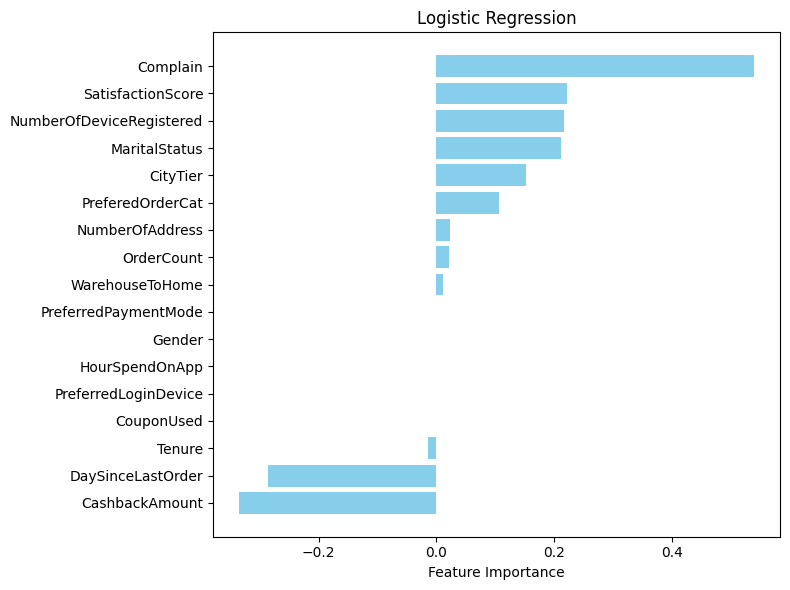

In [24]:

#Feature Importance 추출 (회귀 계수 사용)
coefficients = best_model_lr.coef_[0]
feature_names = X_train.columns  # X_train이 DataFrame이라고 가정

#Feature Importance를 DataFrame으로 변환
importance_df = pd.DataFrame({'feature': feature_names, 'importance': coefficients})

#중요도에 따라 정렬
importance_df = importance_df.sort_values('importance', ascending=False)

#시각화
plt.figure(figsize=(8, 6))
plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Logistic Regression')
plt.gca().invert_yaxis()  # 가장 중요한 특성을 상단에 표시
plt.tight_layout()
plt.show()

In [25]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Decision Tree 모델 초기화
model = DecisionTreeClassifier(random_state=42)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(x_train_resample, y_train_resample)

# 최적의 하이퍼파라미터 출력
print("최적의 파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_) 

# 최적 모델로 예측 수행
best_model_de = grid_search.best_estimator_
y_pred = best_model_de.predict(x_val)
# 최적의 모델로 검증 데이터 예측
y_val_pred = grid_search.best_estimator_.predict(x_val)

# 검증 데이터 평가 지표
print("\n검증 데이터 성능 보고서:")
print(classification_report(y_val, y_val_pred))

최적의 파라미터: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 정확도: 0.9784057812851696

검증 데이터 성능 보고서:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       673
           1       0.87      0.79      0.83       138

    accuracy                           0.94       811
   macro avg       0.91      0.88      0.90       811
weighted avg       0.94      0.94      0.94       811



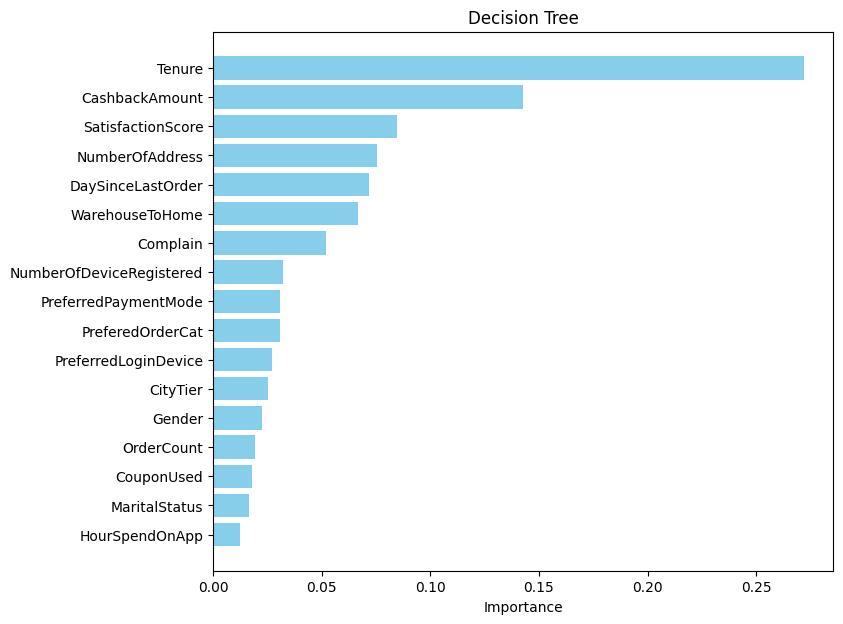

In [26]:
# Feature Importance 추출
importances = best_model_de.feature_importances_
feature_names = X_train.columns  # 또는 X_train의 피처 이름을 리스트로 사용

# DataFrame으로 변환
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(8, 7))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Decision Tree')
plt.gca().invert_yaxis()  # 높은 중요도를 위로
plt.show()

In [27]:
# RandomForest
# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 200],            # 결정 트리의 수
    'max_depth': [None, 10, 20, 30],           # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],           # 노드를 분할하는 데 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],             # 리프 노드에 필요한 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2']  # 최적의 분할을 찾기 위해 고려할 특성 수
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',  # 평가 지표
                           cv=5,                # 5-폴드 교차 검증
                           verbose=2,          # 출력 레벨
                           n_jobs=-1)          # 모든 CPU 사용

# GridSearchCV 훈련
grid_search.fit(x_train_resample, y_train_resample)

# 최적의 하이퍼파라미터 및 교차 검증 점수 출력
print("최적의 파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)

# 최적 모델로 검증 데이터 평가
best_model_rf = grid_search.best_estimator_
y_pred = best_model_rf.predict(x_val)

# 분류 보고서 출력
print("검증 데이터에 대한 분류 보고서:")
print(classification_report(y_val, y_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
259 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-

최적의 파라미터: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
최고 정확도: 0.9885586709052687
검증 데이터에 대한 분류 보고서:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       673
           1       0.92      0.83      0.87       138

    accuracy                           0.96       811
   macro avg       0.94      0.91      0.93       811
weighted avg       0.96      0.96      0.96       811



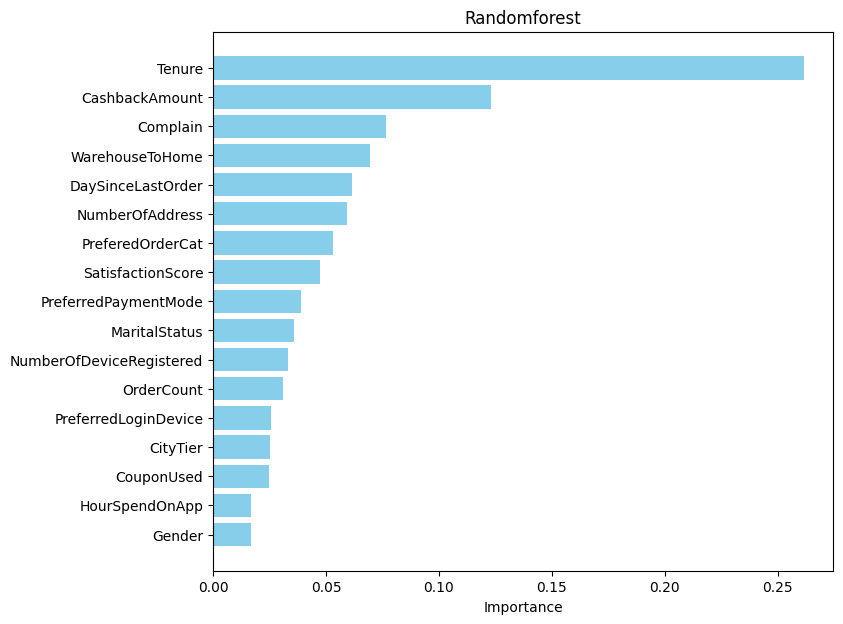

In [28]:
# Feature Importance 추출
importances = best_model_rf.feature_importances_
feature_names = X_train.columns  # 또는 X_train의 피처 이름을 리스트로 사용

# DataFrame으로 변환
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(8, 7))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Randomforest')
plt.gca().invert_yaxis()  # 높은 중요도를 위로
plt.show()

In [29]:
# XGBoost

import xgboost as xgb

xgb_model = xgb.XGBClassifier(eval_metric='logloss')

xgb_params = {
    'max_depth': [3, 5, 7, 9],  # 트리의 최대 깊이
    'learning_rate': [0.1],  # 학습률
    'n_estimators': [100, 200, 300],  # 부스팅 라운드 수
    'subsample': [0.5, 0.7],  # 각 트리의 훈련에 사용되는 샘플 비율
    'colsample_bytree': [0.5, 0.7, 1.0],  # 각 트리의 훈련에 사용되는 피처 비율
    'gamma': [0, 0.1],  # 노드 분할에 대한 최소 손실 감소
    'reg_alpha': [0],  # L1 정규화
    'reg_lambda': [0.1]  # L2 정규화
}
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, scoring='accuracy', cv=5)
xgb_grid.fit(x_train_resample, y_train_resample)

print(f'최적의 하이퍼파라미터: {xgb_grid.best_params_}')
print(f'최고 정확도: {xgb_grid.best_score_}')

# 최적 모델로 예측 수행
best_model_xgb = xgb_grid.best_estimator_
predictions = best_model_xgb.predict(x_val)

# 이진 예측 결과 출력
print("검증 데이터에 대한 분류 보고서:")
print(classification_report(y_val, predictions))


최적의 하이퍼파라미터: {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 0.5}
최고 정확도: 0.988004313561141
검증 데이터에 대한 분류 보고서:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       673
           1       0.93      0.87      0.90       138

    accuracy                           0.97       811
   macro avg       0.95      0.93      0.94       811
weighted avg       0.97      0.97      0.97       811



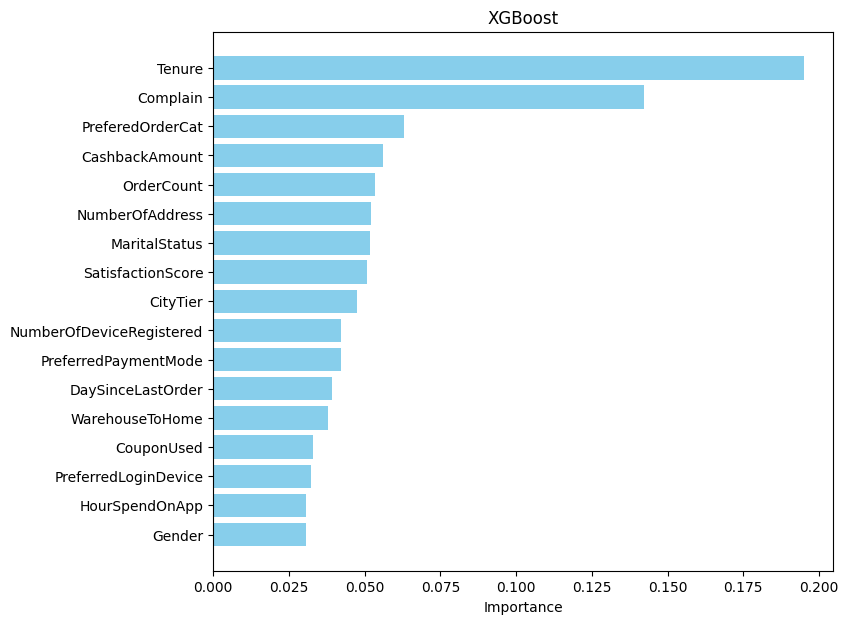

In [30]:
# Feature Importance 추출
importances = best_model_xgb.feature_importances_
feature_names = X_train.columns  # 또는 X_train의 피처 이름을 리스트로 사용

# DataFrame으로 변환
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(8, 7))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('XGBoost')
plt.gca().invert_yaxis()  # 높은 중요도를 위로
plt.show()

In [32]:
# CatBoost
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(verbose=False)

cat_params = {
    'iterations': [100, 200, 500],  # 학습 반복 수
    'depth': [3, 5, 7, 10],  # 트리의 깊이
    'learning_rate': [0.1, 0.3],  # 학습률
    'l2_leaf_reg': [1, 3, 5],  # L2 정규화
    'border_count': [32, 64],  # 경계 수
    'bagging_temperature': [0, 0.5, 1],  # 배깅 온도
    'early_stopping_rounds': [10]  # 조기 중단 라운드 수
}

cat_grid = GridSearchCV(estimator=cat_model, param_grid=cat_params, scoring='accuracy', cv=5)
cat_grid.fit(x_train_resample, y_train_resample)

print(f'최적의 파라미터: {cat_grid.best_params_}')
print(f'최고 정확도: {cat_grid.best_score_}')

# 최적 모델로 예측 수행
best_model_cat = cat_grid.best_estimator_
predictions = best_model_cat.predict(x_val)

# 이진 예측 결과 출력
print("검증 데이터 성능 보고서:")
print(classification_report(y_val, predictions))

최적의 파라미터: {'bagging_temperature': 0, 'border_count': 32, 'depth': 10, 'early_stopping_rounds': 10, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
최고 정확도: 0.9904031782700098
검증 데이터 성능 보고서:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       673
           1       0.92      0.86      0.89       138

    accuracy                           0.96       811
   macro avg       0.95      0.92      0.93       811
weighted avg       0.96      0.96      0.96       811



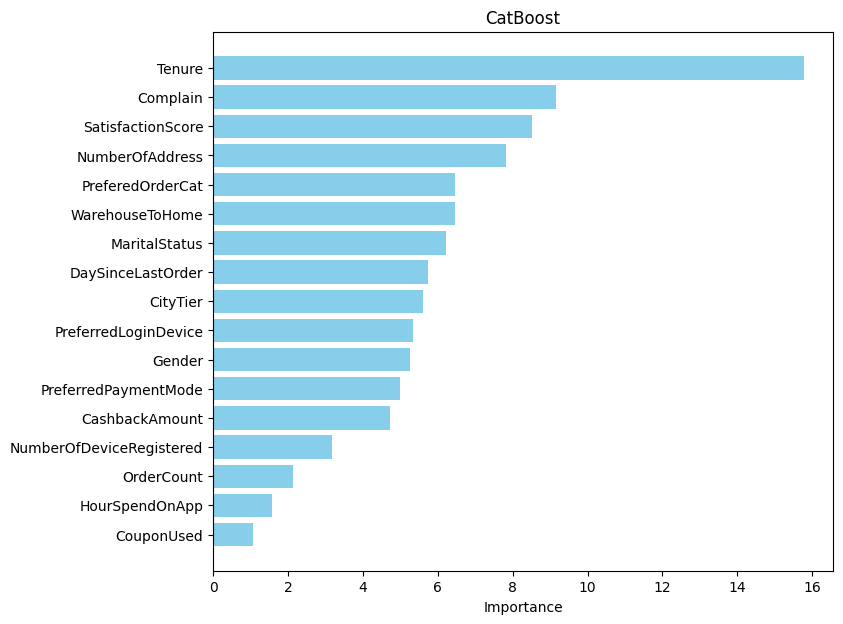

In [33]:
# Feature Importance 추출
importances = best_model_cat.feature_importances_
feature_names = X_train.columns  # 또는 X_train의 피처 이름을 리스트로 사용

# DataFrame으로 변환
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(8, 7))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('CatBoost')
plt.gca().invert_yaxis()  # 높은 중요도를 위로
plt.show()

In [34]:
from sklearn.neural_network import MLPClassifier

# MLP 모델 설정
model = MLPClassifier(max_iter=5000, random_state=42, tol=1e-5)  # max_iter와 tol 조정

# 하이퍼파라미터 그리드 설정
param_grid = {
    'hidden_layer_sizes': [(10,)], #(20,), (10, 10)],  # 작은 네트워크 구조만 남김
    'activation': ['relu', 'tanh'],  # 자주 사용되는 두 가지 활성화 함수
    'solver': ['adam', 'sgd'],  # 두 가지 주요 최적화 방법
    'alpha': [0.0001, 0.001, 0.01]  # 적절한 정규화 값으로 범위 축소
}

# 그리드 서치 설정
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# 그리드 서치 실행
grid_search.fit(x_train_resample, y_train_resample)

# 최적의 파라미터 및 성능 출력
print("최적의 파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)

# 테스트 데이터에 대한 예측
y_pred = grid_search.predict(x_val)

# 최적 모델로 예측 수행
best_model_mlp = grid_search.best_estimator_
predictions = best_model_mlp.predict(x_val)

# 성능 평가
print("검증 데이터 성능 보고서:")
print(classification_report(y_val, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
최적의 파라미터: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (10,), 'solver': 'adam'}
최고 정확도: 0.8929483837774665
검증 데이터 성능 보고서:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       673
           1       0.64      0.88      0.74       138

    accuracy                           0.90       811
   macro avg       0.81      0.89      0.84       811
weighted avg       0.92      0.90      0.90       811



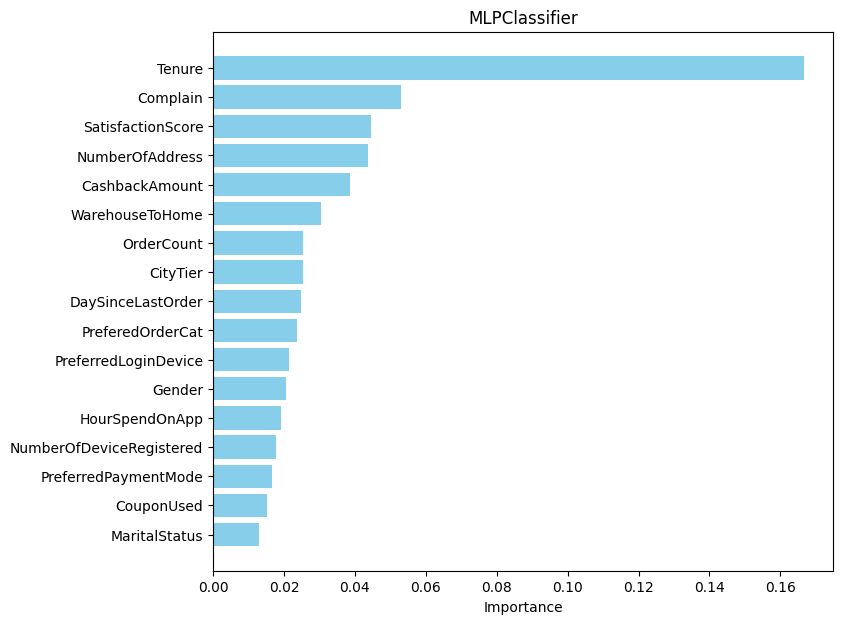

In [35]:
from sklearn.inspection import permutation_importance

# 
#  Permutation Importance 계산
result = permutation_importance(best_model_mlp, x_val, y_val, n_repeats=30, random_state=42)

# Feature Importance를 DataFrame으로 변환
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': result.importances_mean})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(8, 7))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('MLPClassifier')
plt.gca().invert_yaxis()
plt.show()

In [36]:
# GradientBoost

from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier 모델 초기화
model = GradientBoostingClassifier(random_state=42)

# 수정된 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 150],  # 트리 개수 범위 축소
    'learning_rate': [0.05, 0.1],  # learning_rate 범위 축소
    'max_depth': [3, 4],  # 최대 깊이 범위 축소
    'min_samples_split': [5, 10],  # 최소 샘플 수 범위 축소
    'min_samples_leaf': [2, 4],  # 리프 노드 최소 샘플 수 범위 축소
    'subsample': [0.8, 1.0],  # 서브샘플링 비율 범위 축소
    'max_features': ['sqrt', 'log2']  # 특성 선택 방법 축소
}

# 그리드 서치 객체 생성 (교차 검증 횟수 감소)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(x_train_resample, y_train_resample)

# 최적의 하이퍼파라미터 출력
print("최적의 파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)

# 최적의 모델로 검증 데이터 예측
y_val_pred = grid_search.best_estimator_.predict(x_val)

# 최적 모델로 예측 수행
best_model_grb = grid_search.best_estimator_
predictions = best_model_grb.predict(x_val)

# 검증 데이터 평가 지표
print("\n검증 데이터 성능 보고서:")
print(classification_report(y_val, y_val_pred))

최적의 파라미터: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150, 'subsample': 1.0}
최고 정확도: 0.9486911101797999

검증 데이터 성능 보고서:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       673
           1       0.71      0.89      0.79       138

    accuracy                           0.92       811
   macro avg       0.84      0.91      0.87       811
weighted avg       0.93      0.92      0.92       811



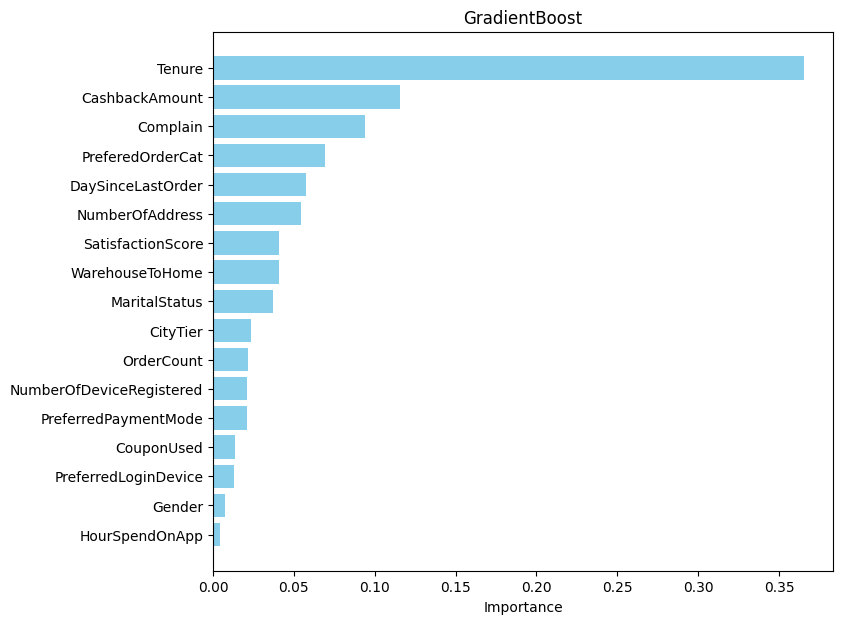

In [37]:
# Feature Importance 추출
importances = best_model_grb.feature_importances_
feature_names = X_train.columns  # 또는 X_train의 피처 이름을 리스트로 사용

# DataFrame으로 변환
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(8, 7))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('GradientBoost')
plt.gca().invert_yaxis()  # 높은 중요도를 위로
plt.show()

In [38]:
# adaboost

# AdaBoostClassifier 하이퍼파라미터 그리드 상세 정의
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 1.0, 10.0],
    'estimator': [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3)
    ],
    'algorithm': ['SAMME', 'SAMME.R'],
    'random_state': [42, None]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

# GridSearchCV 훈련
grid_search.fit(x_train_resample, y_train_resample)

# 최적의 하이퍼파라미터 및 교차 검증 점수 출력
print("최적의 파라미터:", grid_search.best_params_)
print("최고의 교차 검증 점수:", grid_search.best_score_)

# 최적 모델로 검증 데이터 평가
best_model_ada = grid_search.best_estimator_
y_val_pred = best_model_ada.predict(x_val)

# 결과 출력
print("검증 데이터에 대한 분류 보고서:")
print(classification_report(y_val, y_val_pred))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.2s
[CV] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50, random_state=None; total time=   0.2s
[CV] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.3s
[CV] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.2s
[CV] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50, random_state=None; total time=   0.2s
[CV] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.3s
[CV] END algorithm=SAMME, estimator=DecisionTreeClassifie

/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=300, random_state=42; total time=   2.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.4s
[CV] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=300, random_state=42; total time=   2.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50, random_state=None; total time=   0.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50, random_state=None; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50, random_state=None; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50, random_state=None; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50, random_state=None; total time=   0.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=300, random_state=None; total time=   2.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100, random_state=42; total time=   0.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=300, random_state=None; total time=   2.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100, random_state=42; total time=   0.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100, random_state=42; total time=   0.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100, random_state=None; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100, random_state=None; total time=   0.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100, random_state=None; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100, random_state=None; total time=   0.5s
[CV] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=300, random_state=None; total time=   2.9s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100, random_state=None; total time=   0.6s
[CV] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=300, random_state=None; total time=   2.9s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200, random_state=42; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200, random_state=42; total time=   1.1s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200, random_state=42; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200, random_state=42; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200, random_state=42; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200, random_state=None; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200, random_state=None; total time=   1.1s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200, random_state=None; total time=   1.2s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200, random_state=None; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200, random_state=None; total time=   1.1s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=300, random_state=42; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=300, random_state=42; total time=   1.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=300, random_state=42; total time=   1.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=300, random_state=42; total time=   1.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=300, random_state=42; total time=   1.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50, random_state=42; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50, random_state=42; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50, random_state=42; total time=   0.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50, random_state=42; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=300, random_state=None; total time=   1.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50, random_state=42; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50, random_state=None; total time=   0.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50, random_state=None; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50, random_state=None; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=300, random_state=None; total time=   1.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50, random_state=None; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50, random_state=None; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=300, random_state=None; total time=   1.7s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100, random_state=42; total time=   0.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=300, random_state=None; total time=   1.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=10

/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100, random_state=None; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100, random_state=None; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100, random_state=None; total time=   0.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100, random_state=None; total time=   0.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200, random_state=42; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200, random_state=42; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200, random_state=42; total time=   1.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200, random_state=42; total time=   1.1s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200, random_state=None; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200, random_state=42; total time=   1.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200, random_state=None; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200, random_state=None; total time=   1.1s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200, random_state=None; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200, random_state=None; total time=   1.1s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300, random_state=42; total time=   1.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300, random_state=42; total time=   1.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300, random_state=42; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300, random_state=42; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300, random_state=42; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300, random_state=None; total time=   1.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50, random_state=42; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50, random_state=42; total time=   0.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50, random_state=42; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50, random_state=42; total time=   0.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50, random_state=42; total time=   0.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50, random_state=None; total time=   0.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50, random_state=None; total time=   0.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50, random_state=None; total time=   0.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300, random_state=None; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300, random_state=None; total time=   1.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50, random_state=None; total time=   0.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50, random_state=None; total time=   0.2s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=100, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=100, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=100, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300, random_state=None; total time=   1.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=100, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300, random_state=None; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=1

/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=100, random_state=None; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=100, random_state=None; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=100, random_state=None; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=100, random_state=None; total time=   0.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200, random_state=42; total time=   1.0s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200, random_state=42; total time=   1.0s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200, random_state=42; total time=   1.0s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200, random_state=42; total time=   1.0s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200, random_state=42; total time=   0.9s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200, random_state=None; total time=   0.9s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200, random_state=None; total time=   0.9s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200, random_state=None; total time=   0.9s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200, random_state=None; total time=   0.9s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200, random_state=None; total time=   0.9s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300, random_state=42; total time=   1.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300, random_state=42; total time=   1.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300, random_state=42; total time=   1.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300, random_state=42; total time=   1.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300, random_state=42; total time=   1.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300, random_state=None; total time=   1.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=50, random_state=42; total time=   0.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=50, random_state=42; total time=   0.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=50, random_state=42; total time=   0.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=50, random_state=42; total time=   0.2s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=50, random_state=42; total time=   0.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=50, random_state=None; total time=   0.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=50, random_state=None; total time=   0.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=50, random_state=None; total time=   0.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300, random_state=None; total time=   1.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300, random_state=None; total time=   1.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=50, random_state=None; total time=   0.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=50, random_state=None; total time=   0.2s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=100, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=100, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=100, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300, random_state=None; total time=   1.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300, random_state=None; total time=   1.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=100, random_state=42; total time=   0.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=100, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=100, random_state=None; total time=   0.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=100, random_state=None; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=100, random_state=None; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=100, random_state=None; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=100, random_state=None; total time=   0.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=200, random_state=42; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=200, random_state=42; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=200, random_state=42; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=200, random_state=42; total time=   1.1s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=200, random_state=42; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=200, random_state=None; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=200, random_state=None; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=200, random_state=None; total time=   1.1s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=200, random_state=None; total time=   1.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=200, random_state=None; total time=   1.2s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=300, random_state=42; total time=   1.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=300, random_state=42; total time=   1.9s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=300, random_state=42; total time=   2.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=300, random_state=42; total time=   2.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=300, random_state=None; total time=   2.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=300, random_state=42; total time=   2.2s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=300, random_state=None; total time=   2.0s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=300, random_state=None; total time=   2.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=50, random_state=None; total time=   0.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=50, random_state=None; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=50, random_state=None; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=50, random_state=None; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=50, random_state=None; total time=   0.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=300, random_state=None; total time=   1.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=10.0, n_estimators=300, random_state=None; total time=   1.9s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=100, random_state=42; total time=   0.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=100, random_state=42; total time=   0.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=100, random_state=42; total time=   0.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=100, random_state=42; total time=   0.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=100, random_state=42; total time=   0.7s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=100, random_state=None; total time=   0.7s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=100, random_state=None; total time=   0.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=100, random_state=None; total time=   0.7s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=100, random_state=None; total time=   0.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=100, random_state=None; total time=   0.8s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=200, random_state=42; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=200, random_state=42; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=200, random_state=42; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=200, random_state=42; total time=   1.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=200, random_state=42; total time=   1.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=200, random_state=None; total time=   1.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=200, random_state=None; total time=   1.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=200, random_state=None; total time=   1.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=200, random_state=None; total time=   1.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=200, random_state=None; total time=   1.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=300, random_state=42; total time=   2.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=300, random_state=42; total time=   2.1s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=300, random_state=42; total time=   2.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=300, random_state=42; total time=   2.2s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=300, random_state=42; total time=   2.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=300, random_state=None; total time=   2.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=50, random_state=42; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=50, random_state=42; total time=   0.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=50, random_state=42; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=50, random_state=42; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=50, random_state=42; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=50, random_state=None; total time=   0.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=50, random_state=None; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=50, random_state=None; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=50, random_state=None; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=300, random_state=None; total time=   2.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=300, random_state=None; total time=   2.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=50, random_state=None; total time=   0.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=100, random_state=42; total time=   0.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=100, random_state=42; total time=   0.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=100, random_state=42; total time=   0.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=100, random_state=42; total time=   0.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=100, random_state=42; total time=   0.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=300, random_state=None; total time=   2.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=10

/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=300, random_state=None; total time=   2.2s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=100, random_state=None; total time=   0.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=100, random_state=None; total time=   0.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=100, random_state=None; total time=   0.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=100, random_state=None; total time=   0.8s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=200, random_state=42; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=200, random_state=42; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=200, random_state=42; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=200, random_state=42; total time=   1.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=200, random_state=None; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=200, random_state=42; total time=   1.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=200, random_state=None; total time=   1.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=200, random_state=None; total time=   1.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=200, random_state=None; total time=   1.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=200, random_state=None; total time=   1.8s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=300, random_state=42; total time=   2.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=300, random_state=42; total time=   2.7s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=300, random_state=42; total time=   2.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=300, random_state=42; total time=   2.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=300, random_state=42; total time=   2.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=300, random_state=None; total time=   2.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=50, random_state=42; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=50, random_state=42; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=50, random_state=42; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=50, random_state=42; total time=   0.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=50, random_state=42; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=50, random_state=None; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=300, random_state=None; total time=   2.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=50, random_state=None; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=50, random_state=None; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=300, random_state=None; total time=   2.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=50, random_state=None; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=50, random_state=None; total time=   0.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=100, random_state=42; total time=   0.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=100, random_state=42; total time=   0.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=100, random_state=42; total time=   0.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=100, random_state=42; total time=   0.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=300, random_state=None; total time=   2.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=300, random_state=None; total time=   2.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=100, random_state=42; total time=   0.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=100, random_state=None; total time=   0.7s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=100, random_state=None; total time=   0.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=100, random_state=None; total time=   0.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=100, random_state=None; total time=   0.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=100, random_state=None; total time=   0.8s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=200, random_state=42; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=200, random_state=42; total time=   1.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=200, random_state=42; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=200, random_state=42; total time=   1.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=200, random_state=42; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=200, random_state=None; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=200, random_state=None; total time=   1.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=200, random_state=None; total time=   1.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=200, random_state=None; total time=   1.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=200, random_state=None; total time=   1.7s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=300, random_state=42; total time=   2.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=300, random_state=42; total time=   2.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=300, random_state=42; total time=   2.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=300, random_state=42; total time=   2.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=300, random_state=42; total time=   2.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=300, random_state=None; total time=   2.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=50, random_state=42; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=50, random_state=42; total time=   0.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=50, random_state=42; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=50, random_state=42; total time=   0.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=50, random_state=42; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=50, random_state=None; total time=   0.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=50, random_state=None; total time=   0.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=300, random_state=None; total time=   2.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=50, random_state=None; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=50, random_state=None; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=300, random_state=None; total time=   2.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=50, random_state=None; total time=   0.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=100, random_state=42; total time=   0.9s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=100, random_state=42; total time=   0.9s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=100, random_state=42; total time=   0.9s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=100, random_state=42; total time=   0.9s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=100, random_state=42; total time=   0.9s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=300, random_state=None; total time=   2.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1.0, n_estimators=300, random_state=None; total time=   2.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=100, random_state=None; total time=   0.9s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=100, random_state=None; total time=   0.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=100, random_state=None; total time=   0.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=100, random_state=None; total time=   0.8s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=100, random_state=None; total time=   0.8s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=200, random_state=42; total time=   1.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=200, random_state=42; total time=   1.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=200, random_state=42; total time=   1.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=200, random_state=42; total time=   1.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=200, random_state=42; total time=   1.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=200, random_state=None; total time=   1.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=200, random_state=None; total time=   1.7s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=200, random_state=None; total time=   1.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=200, random_state=None; total time=   1.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=200, random_state=None; total time=   1.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=300, random_state=42; total time=   2.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=300, random_state=42; total time=   2.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=300, random_state=42; total time=   2.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=300, random_state=42; total time=   2.2s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=300, random_state=None; total time=   2.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=300, random_state=42; total time=   2.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=300, random_state=None; total time=   2.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=300, random_state=None; total time=   2.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50, random_state=None; total time=   0.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50, random_state=None; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50, random_state=None; total time=   0.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50, random_state=None; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50, random_state=None; total time=   0.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=300, random_state=None; total time=   2.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100, random_state=42; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=2), learning_rate=10.0, n_estimators=300, random_state=None; total time=   2.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100, random_state=42; total time=   1.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100, random_state=42; total time=   1.1s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100, random_state=42; total time=   1.2s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100, random_state=42; total time=   1.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100, random_state=None; total time=   1.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100, random_state=None; total time=   1.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100, random_state=None; total time=   1.2s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100, random_state=None; total time=   1.2s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100, random_state=None; total time=   1.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200, random_state=42; total time=   2.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200, random_state=42; total time=   2.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200, random_state=42; total time=   2.7s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200, random_state=42; total time=   2.9s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200, random_state=42; total time=   2.7s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200, random_state=None; total time=   2.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200, random_state=None; total time=   2.8s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200, random_state=None; total time=   2.7s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200, random_state=None; total time=   2.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200, random_state=None; total time=   2.2s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300, random_state=42; total time=   3.0s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300, random_state=42; total time=   3.0s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300, random_state=42; total time=   3.0s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300, random_state=42; total time=   3.0s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300, random_state=42; total time=   3.0s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300, random_state=None; total time=   2.9s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50, random_state=42; total time=   0.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50, random_state=42; total time=   0.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50, random_state=42; total time=   0.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50, random_state=42; total time=   0.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50, random_state=None; total time=   0.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50, random_state=None; total time=   0.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300, random_state=None; total time=   3.1s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50, random_state=None; total time=   0.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50, random_state=None; total time=   0.8s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300, random_state=None; total time=   3.2s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50, random_state=None; total time=   0.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100, random_state=42; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100, random_state=42; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100, random_state=42; total time=   1.0s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100, random_state=42; total time=   1.0s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100, random_state=42; total time=   1.0s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300, random_state=None; total time=   3.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100, random_state=None; total time=   1.0s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300, random_state=None; total time=   3.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100, random_state=None; total time=   1.0s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100, random_state=None; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100, random_state=None; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100, random_state=None; total time=   1.1s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200, random_state=42; total time=   2.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200, random_state=42; total time=   2.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200, random_state=42; total time=   2.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200, random_state=42; total time=   2.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200, random_state=None; total time=   2.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200, random_state=42; total time=   2.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200, random_state=None; total time=   2.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200, random_state=None; total time=   2.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200, random_state=None; total time=   2.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200, random_state=None; total time=   2.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300, random_state=42; total time=   3.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300, random_state=42; total time=   3.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300, random_state=42; total time=   3.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300, random_state=42; total time=   3.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300, random_state=42; total time=   3.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300, random_state=None; total time=   3.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50, random_state=42; total time=   0.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50, random_state=42; total time=   0.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50, random_state=42; total time=   0.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50, random_state=42; total time=   0.7s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50, random_state=42; total time=   0.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50, random_state=None; total time=   0.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50, random_state=None; total time=   0.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50, random_state=None; total time=   0.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300, random_state=None; total time=   3.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50, random_state=None; total time=   0.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300, random_state=None; total time=   3.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50, random_state=None; total time=   0.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100, random_state=42; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100, random_state=42; total time=   1.2s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100, random_state=42; total time=   1.2s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300, random_state=None; total time=   3.9s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100, random_state=42; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100, random_state=42; total time=   1.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100, random_state=None; total time=   1.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300, random_state=None; total time=   3.9s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100, random_state=None; total time=   1.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100, random_state=None; total time=   1.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100, random_state=None; total time=   1.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100, random_state=None; total time=   1.0s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200, random_state=42; total time=   2.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200, random_state=42; total time=   2.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200, random_state=42; total time=   2.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200, random_state=42; total time=   2.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200, random_state=42; total time=   2.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200, random_state=None; total time=   2.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200, random_state=None; total time=   2.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200, random_state=None; total time=   2.6s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200, random_state=None; total time=   2.7s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200, random_state=None; total time=   2.7s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300, random_state=42; total time=   3.9s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300, random_state=42; total time=   4.0s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300, random_state=42; total time=   3.9s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300, random_state=42; total time=   4.0s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300, random_state=42; total time=   4.0s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300, random_state=None; total time=   3.9s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=50, random_state=42; total time=   0.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=50, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=50, random_state=42; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=50, random_state=42; total time=   0.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=50, random_state=42; total time=   0.6s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=50, random_state=None; total time=   0.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=50, random_state=None; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=50, random_state=None; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300, random_state=None; total time=   3.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300, random_state=None; total time=   3.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=50, random_state=None; total time=   0.5s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=50, random_state=None; total time=   0.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=100, random_state=42; total time=   1.0s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=100, random_state=42; total time=   1.0s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=100, random_state=42; total time=   1.0s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=100, random_state=42; total time=   1.0s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=100, random_state=42; total time=   1.0s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300, random_state=None; total time=   3.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=100, random_state=None; total time=   1.0s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300, random_state=None; total time=   3.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=100, random_state=None; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=100, random_state=None; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=100, random_state=None; total time=   1.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=100, random_state=None; total time=   1.1s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=200, random_state=42; total time=   2.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=200, random_state=42; total time=   2.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=200, random_state=42; total time=   2.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=200, random_state=42; total time=   2.2s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=200, random_state=None; total time=   2.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=200, random_state=None; total time=   2.2s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=200, random_state=42; total time=   2.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=200, random_state=None; total time=   2.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorit

[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=200, random_state=None; total time=   2.1s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=200, random_state=None; total time=   2.3s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=300, random_state=42; total time=   3.4s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=300, random_state=42; total time=   3.5s


/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=300, random_state=42; total time=   3.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=300, random_state=42; total time=   3.3s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=300, random_state=None; total time=   3.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=300, random_state=42; total time=   3.4s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=300, random_state=None; total time=   3.1s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_estimators=300, random_state=None; total time=   3.0s
[CV] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=10.0, n_est

/opt/homebrew/Caskroom/miniforge/base/envs/dlpjt/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


최적의 파라미터: {'algorithm': 'SAMME.R', 'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 1.0, 'n_estimators': 300, 'random_state': 42}
최고의 교차 검증 점수: 0.9844975859730896
검증 데이터에 대한 분류 보고서:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       673
           1       0.89      0.78      0.83       138

    accuracy                           0.95       811
   macro avg       0.92      0.88      0.90       811
weighted avg       0.94      0.95      0.94       811



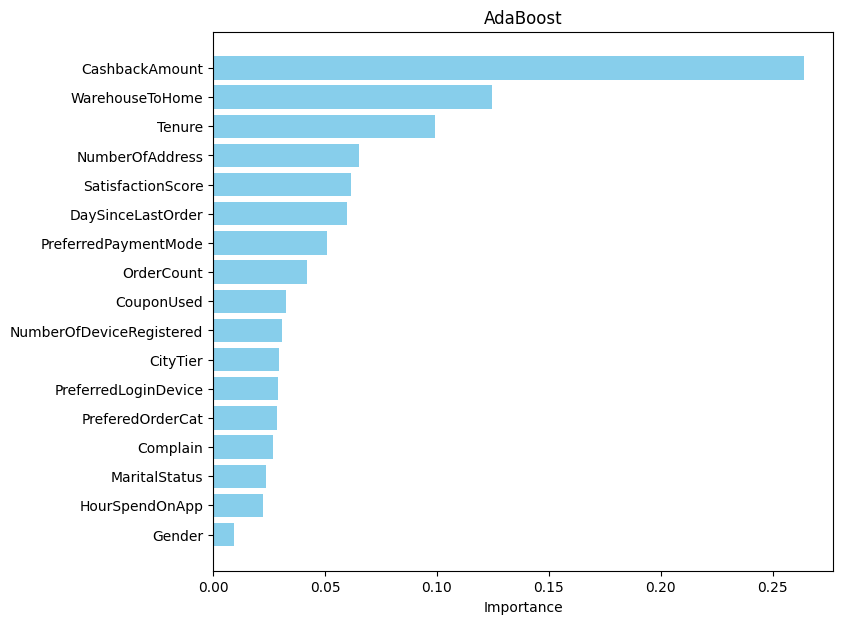

In [39]:
# Feature Importance 추출
importances = best_model_ada.feature_importances_
feature_names = X_train.columns  # 또는 X_train의 피처 이름을 리스트로 사용

# DataFrame으로 변환
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(8, 7))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('AdaBoost')
plt.gca().invert_yaxis()  # 높은 중요도를 위로
plt.show()

### 결론

In [40]:
# 기존 값의 이탈률 계산
actual_churn_rate = np.mean(y_test) * 100  # 실제 이탈률
# 예측 값의 이탈률 계산
predicted_test = best_model_xgb.predict(X_test)
predicted_churn_rate = np.mean(predicted_test) * 100  # 예측 이탈률

# 결과 출력
print(f'실제 이탈률: {actual_churn_rate:.2f}%')
print(f'예측 이탈률: {predicted_churn_rate:.2f}%')

실제 이탈률: 16.29%
예측 이탈률: 15.60%


In [47]:
#한글 설정
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic("matplotlib", "inline")
# %matplotlib inline

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system == "Windows":
    font_name = font_manager.Fontproperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unkown system. sorry~~")

실제 이탈률: 16.29%
예측 이탈률: 15.60%


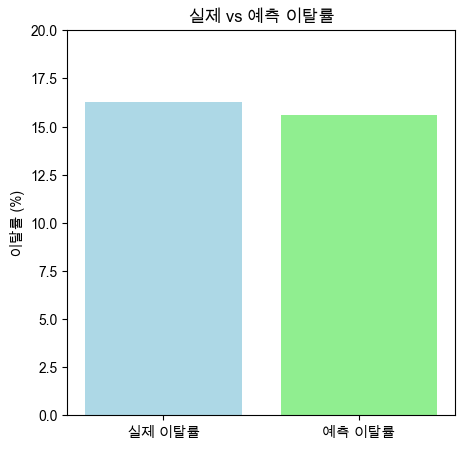

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# 기존 값의 이탈률 계산
actual_churn_rate = np.mean(y_test) * 100  # 실제 이탈률
# 예측 값의 이탈률 계산
predicted_test = best_model_xgb.predict(X_test)
predicted_churn_rate = np.mean(predicted_test) * 100  # 예측 이탈률

# 결과 출력
print(f'실제 이탈률: {actual_churn_rate:.2f}%')
print(f'예측 이탈률: {predicted_churn_rate:.2f}%')

# 시각화
labels = ['실제 이탈률', '예측 이탈률']
values = [actual_churn_rate, predicted_churn_rate]

plt.figure(figsize=(5, 5))
plt.bar(labels, values, color=['lightblue', 'lightgreen'])
plt.title('실제 vs 예측 이탈률')
plt.ylabel('이탈률 (%)')
plt.ylim(0, 20)  # y축 최대값을 30으로 설정

plt.show()

실제 이탈 수치: 165
예측 이탈 수치: 158


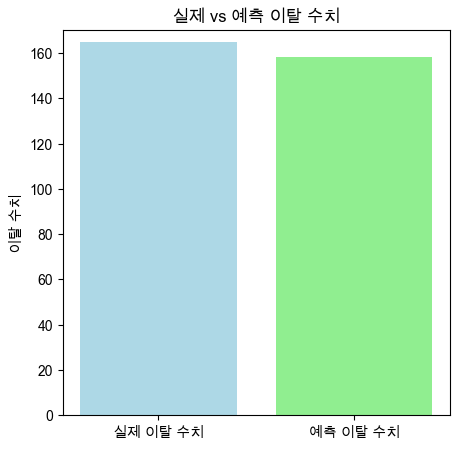

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# 기존 값의 이탈 수치 계산
actual_churn_count = np.sum(y_test)  # 실제 이탈 수치
# 예측 값의 이탈 수치 계산
predicted_test = best_model_xgb.predict(X_test)
predicted_churn_count = np.sum(predicted_test)  # 예측 이탈 수치

# 결과 출력
print(f'실제 이탈 수치: {actual_churn_count}')
print(f'예측 이탈 수치: {predicted_churn_count}')

# 시각화
labels = ['실제 이탈 수치', '예측 이탈 수치']
values = [actual_churn_count, predicted_churn_count]

plt.figure(figsize=(5, 5))
plt.bar(labels, values, color=['lightblue', 'lightgreen'])
plt.title('실제 vs 예측 이탈 수치')
plt.ylabel('이탈 수치')
plt.ylim(0, max(values) + 5)  # y축 최대값 설정


plt.show()


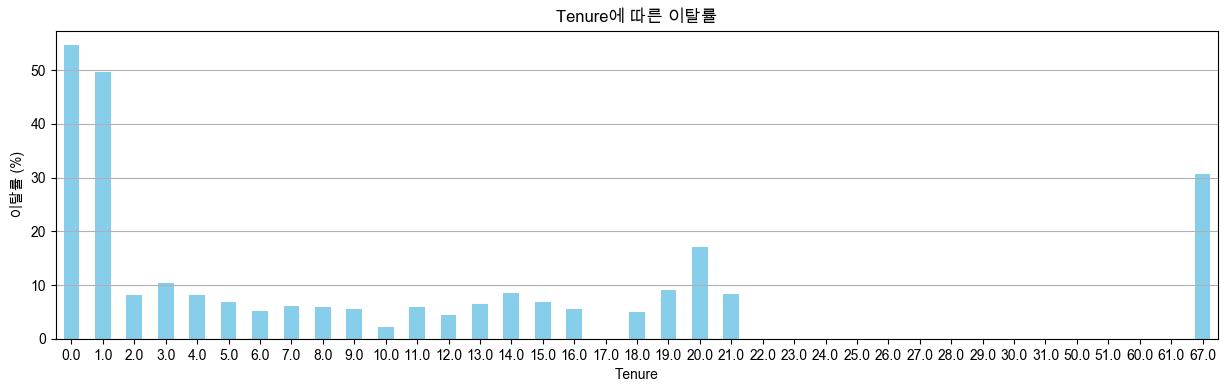

In [44]:
# Tenure

#  클래스별 이탈률 계산
churn_rate = df['Churn'].value_counts(normalize=True) * 100  # 이탈률 백분율

# 각 특성의 고유 값에 대한 이탈률 계산
churn_by_feature = df.groupby('Tenure')['Churn'].mean() * 100

# 시각화
plt.figure(figsize=(15, 4))
churn_by_feature.plot(kind='bar', color='skyblue')
plt.title(f'Tenure에 따른 이탈률')
plt.xlabel('Tenure')
plt.ylabel('이탈률 (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

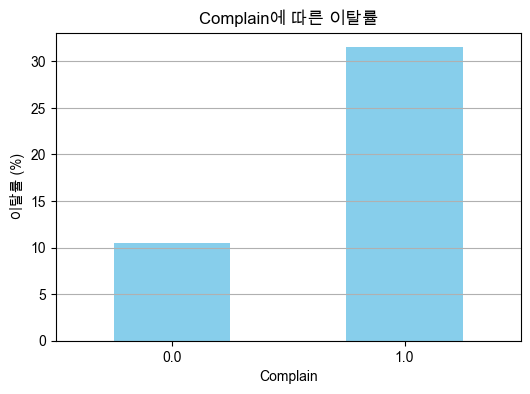

In [45]:
# Complain

col  = 'Complain'
if col in scalers:
    df['inverse_complain'] = scalers[col].inverse_transform(df[[col]])  # DataFrame 형식으로 전달

df.head()

# 각 특성의 고유 값에 대한 이탈률 계산
churn_by_feature = df.groupby('inverse_complain')['Churn'].mean() * 100


# 시각화
plt.figure(figsize=(6, 4))
churn_by_feature.plot(kind='bar', color='skyblue')
plt.title(f'Complain에 따른 이탈률')
plt.xlabel('Complain')
plt.ylabel('이탈률 (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,MaritalStatus,NumberOfAddress,Complain,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,inverse_complain,recashback,cashback_bin
0,50001,1,4.0,1,1.479106,-0.983967,4,0,0.113893,-0.678414,...,2,1.840180,1.575910,-0.353570,-0.633891,0.107397,-0.345321,1.0,159.93,150-175
1,50002,1,67.0,2,-0.710481,-0.762603,6,1,0.113893,0.300830,...,2,1.065794,1.575910,-0.901393,-0.633891,-1.289536,-1.133221,1.0,120.90,100-125
2,50003,1,67.0,2,-0.710481,1.672403,4,1,-1.269482,0.300830,...,2,0.678601,1.575910,-0.901393,-0.633891,-0.451376,-1.145737,1.0,120.28,100-125
3,50004,1,0.0,2,1.479106,0.012172,4,1,-1.269482,0.300830,...,2,1.452987,-0.634554,-0.901393,-0.633891,-0.451376,-0.867358,0.0,134.07,125-150
5,50006,1,0.0,0,-0.710481,0.786946,4,0,0.113893,1.280074,...,2,-0.870172,1.575910,1.289898,1.118270,0.666170,-0.764000,1.0,139.19,125-150


/var/folders/b1/g1njf16x0rz622dj3vfvfyy80000gn/T/ipykernel_54656/2571336506.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_feature = df.groupby('cashback_bin')['Churn'].mean() * 100


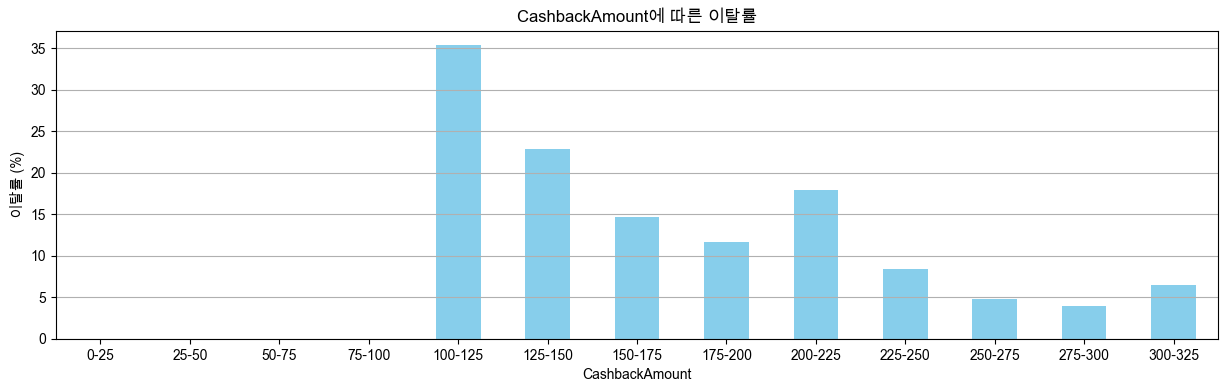

In [46]:
# CashbackAmount
col  = 'CashbackAmount'
if col in scalers:
    df['recashback'] = scalers[col].inverse_transform(df[[col]])  # DataFrame 형식으로 전달

df.head()

# cashbackAmount 구간화
bins = range(0, 326, 25)  # 0부터 350까지 25씩 증가하는 구간 생성
labels = [f'{i}-{i + 25}' for i in bins[:-1]]  # 레이블 생성

df['cashback_bin'] = pd.cut(df['recashback'], 
                            bins=bins, 
                            labels=labels, right=True)

# 각 특성의 고유 값에 대한 이탈률 계산
churn_by_feature = df.groupby('cashback_bin')['Churn'].mean() * 100


# 시각화
plt.figure(figsize=(15, 4))
churn_by_feature.plot(kind='bar', color='skyblue')
plt.title(f'CashbackAmount에 따른 이탈률')
plt.xlabel('CashbackAmount')
plt.ylabel('이탈률 (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()